In [16]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean, median
plt.rcParams['figure.figsize'] = (20, 12)
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import gaussian_kde

In [17]:
def make_scatter(x,y):
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    return [x,y,z]

In [18]:
data = genfromtxt('ik_nr.csv', delimiter=';')
for i in range(6):
    data[:,7+i] = np.abs(data[:,7+i])-np.pi*8/9
processed = np.empty((len(data),3))
processed[:,0] = data[:,0]
processed[:,1] = np.mean(data[:,1:7],axis=1)
processed[:,2] = np.mean(data[:,7:],axis=1)

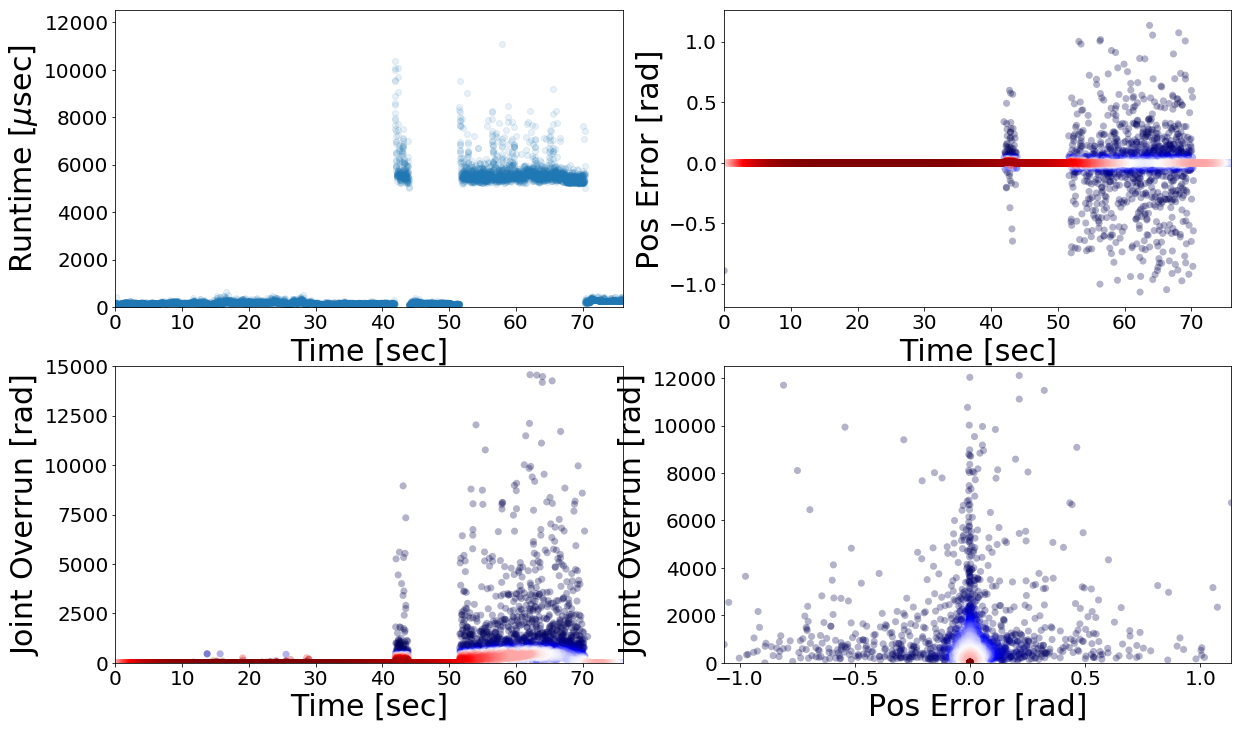

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)

x = np.linspace(0,len(processed)/100,len(processed))
axes[0,0].scatter(x,data[:,0],alpha=0.1)
axes[0,0].set_ylim([0,15000])
axes[0,0].set_xlabel('Time [sec]', size=30)
axes[0,0].set_ylabel('Runtime [$\mu$sec]', size=30)
axes[0,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[0,0].set_ylim([0,12500])
axes[0,0].set_xlim([0,max(x)])

sc1  = make_scatter(x,processed[:,1])
axes[0,1].scatter(sc1[0], sc1[1], c=sc1[2],s=50, edgecolor='',alpha=0.3, cmap=plt.get_cmap("seismic"))
axes[0,1].set_xlabel('Time [sec]', size=30)
axes[0,1].set_ylabel('Pos Error [rad]', size=30)
axes[0,1].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[0,1].set_xlim([0,max(x)])

sc2  = make_scatter(x,processed[:,2])
axes[1,0].scatter(sc2[0], sc2[1], c=sc1[2], s=50, edgecolor='',alpha=0.3, cmap=plt.get_cmap("seismic"))
axes[1,0].set_xlabel('Time [sec]', size=30)
axes[1,0].set_ylabel('Joint Overrun [rad]', size=30)
axes[1,0].set_ylim([0,15000])
axes[1,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[1,0].set_xlim([0,max(x)])

sc3  = make_scatter(processed[:,1],processed[:,2])
axes[1,1].scatter(sc3[0], sc3[1], c=sc1[2], s=50, edgecolor='',alpha=0.3, cmap=plt.get_cmap("seismic"))
axes[1,1].set_xlabel('Pos Error [rad]', size=30)
axes[1,1].set_ylabel('Joint Overrun [rad]', size=30)
axes[1,1].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[1,1].set_ylim([0,12500])
axes[1,1].set_xlim([min(processed[:,1]),max(processed[:,1])])

plt.savefig('/home/robotronics/Pictures/ik_nr.png', format='png', dpi=100)

In [20]:
data = genfromtxt('ik_lm.csv', delimiter=';')
for i in range(6):
    data[:,7+i] = np.abs(data[:,7+i])-np.pi*8/9
processed = np.empty((len(data),3))
processed[:,0] = data[:,0]
processed[:,1] = np.mean(data[:,1:7],axis=1)
processed[:,2] = np.mean(data[:,7:],axis=1)

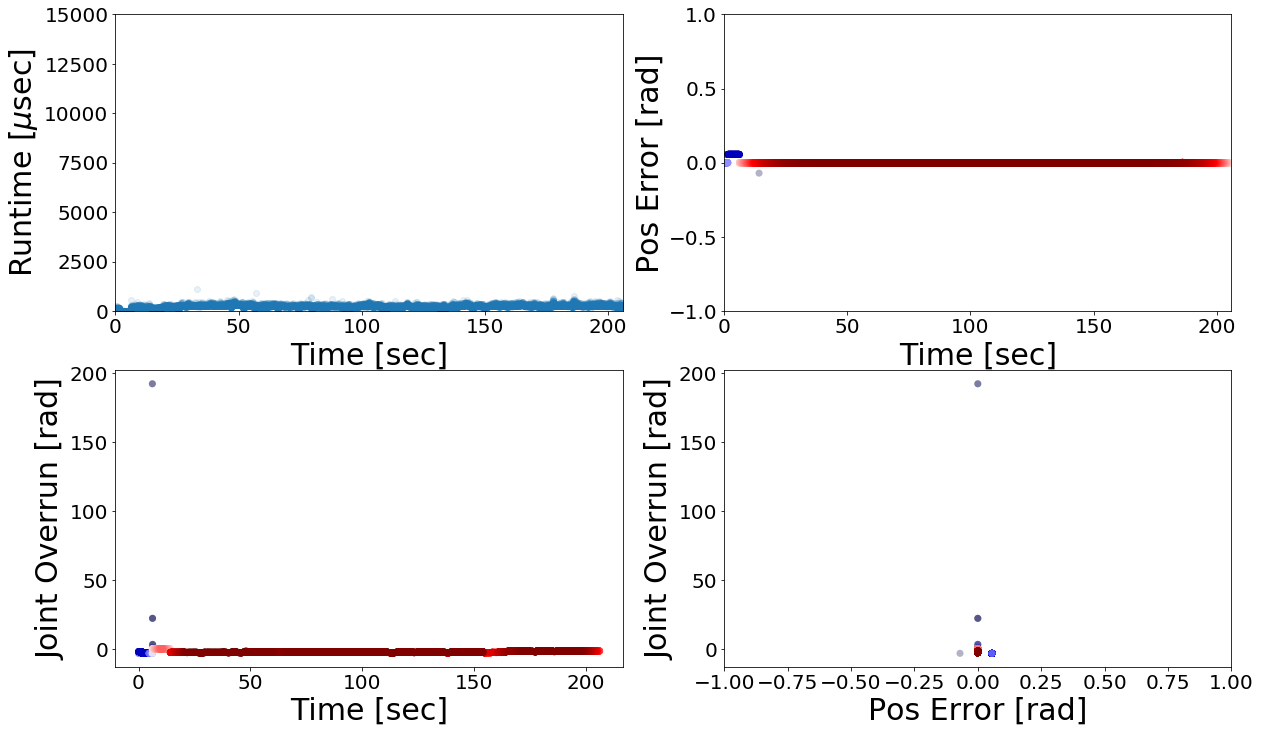

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)

x = np.linspace(0,len(processed)/100,len(processed))
axes[0,0].scatter(x,data[:,0],alpha=0.1)
axes[0,0].set_ylim([0,15000])
axes[0,0].set_xlabel('Time [sec]', size=30)
axes[0,0].set_ylabel('Runtime [$\mu$sec]', size=30)
axes[0,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
#axes[0,0].set_ylim([0,12500])
axes[0,0].set_xlim([0,max(x)])

sc1  = make_scatter(x,processed[:,1])
axes[0,1].scatter(sc1[0], sc1[1], c=sc1[2], s=50, edgecolor='',alpha=0.3, cmap=plt.get_cmap("seismic"))
axes[0,1].set_xlabel('Time [sec]', size=30)
axes[0,1].set_ylabel('Pos Error [rad]', size=30)
axes[0,1].tick_params(axis = 'both', which = 'major', labelsize = 20)
axes[0,1].set_xlim([0,max(x)])
axes[0,1].set_ylim([-1,1])

sc2  = make_scatter(x,processed[:,2])
axes[1,0].scatter(sc2[0], sc2[1], c=sc1[2], s=50, edgecolor='',alpha=0.3, cmap=plt.get_cmap("seismic"))
axes[1,0].set_xlabel('Time [sec]', size=30)
axes[1,0].set_ylabel('Joint Overrun [rad]', size=30)
#axes[1,0].set_ylim([0,50])
axes[1,0].tick_params(axis = 'both', which = 'major', labelsize = 20)
#axes[1,0].set_xlim([0,max(x)])

sc3  = make_scatter(processed[:,1],processed[:,2])
axes[1,1].scatter(sc3[0], sc3[1], c=sc1[2], s=50, edgecolor='',alpha=0.3, cmap=plt.get_cmap("seismic"))
axes[1,1].set_xlabel('Pos Error [rad]', size=30)
axes[1,1].set_ylabel('Joint Overrun [rad]', size=30)
axes[1,1].tick_params(axis = 'both', which = 'major', labelsize = 20)
#axes[1,1].set_ylim([0,12500])
axes[1,1].set_xlim([-1,1])

plt.savefig('/home/robotronics/Pictures/ik_lm.png', format='png', dpi=100)